| Changes | Time | Difficulty | 
|---------|------|------------|
|Change the number of neighbour down to 3 and change the weight of neighbour to be inverse to the distance and get an accuracy of 52% from 45%|30 mins|3|
|Use manhattan metric and get an accuracy of 52%|15 mins|2|
|Use cross validation to try different neighbour and 20 neighbour return the highest accuracy with 63%|30 mins|3|
|Using standard scaler to normalised the features.Get an accuracy of 66%|20 mins|2|
|Try stratify on training split to ensure the model learn all if not most rating of wine and get an accuracy of 67.5%|40 mins|4|
|Try different weight of neighbors but all return lower than using weight='distance'|30 mins|3|
|Try simplifying the data to be good wine and bad wine and the model perform alot better and get accuracy of 93%|1 hour|6|

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_path = 'wine_data.csv'
df = pd.read_csv(file_path)

In [4]:
scaler = StandardScaler()
X = df.iloc[:, :-1]
Normalized_X = scaler.fit_transform(X)
y = df["quality"]

X_train ,X_test ,y_train ,y_test = train_test_split(Normalized_X, y, test_size=0.15,random_state=42,stratify=y)

model = KNeighborsClassifier(n_neighbors=20,weights='distance',metric='manhattan')

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test , predictions)
print(f'Accuracy: {accuracy:.4f}')

print(classification_report(y_test,predictions,zero_division=0))

Accuracy: 0.6750
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.74      0.76      0.75       102
           6       0.62      0.73      0.67        96
           7       0.68      0.43      0.53        30
           8       0.50      0.33      0.40         3

    accuracy                           0.68       240
   macro avg       0.42      0.38      0.39       240
weighted avg       0.65      0.68      0.66       240



In [5]:
model = KNeighborsClassifier(n_neighbors=20,weights='distance',metric='manhattan')
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation accuracy: 0.6696 ± 0.0112


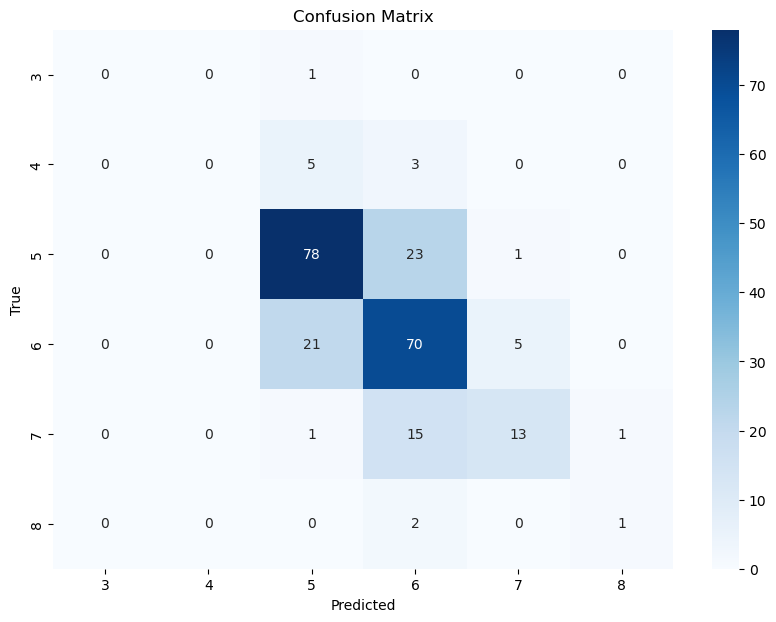

In [6]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(3, 9), yticklabels=np.arange(3, 9))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [7]:
scaler = StandardScaler()
X = df.iloc[:, :-1]
Normalized_X = scaler.fit_transform(X)
y = (df["quality"] > 6.5).astype(int)

X_train ,X_test ,y_train ,y_test = train_test_split(Normalized_X, y, test_size=0.15,random_state=42,stratify=y)

model = KNeighborsClassifier(n_neighbors=20,weights='distance',metric='manhattan')

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test , predictions)
print(f'Accuracy: {accuracy:.4f}')

print(classification_report(y_test,predictions))

Accuracy: 0.9333
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       207
           1       0.81      0.67      0.73        33

    accuracy                           0.93       240
   macro avg       0.88      0.82      0.85       240
weighted avg       0.93      0.93      0.93       240



In [8]:
model = KNeighborsClassifier(n_neighbors=20,weights='distance',metric='manhattan')
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-validation accuracy: 0.8926 ± 0.0119


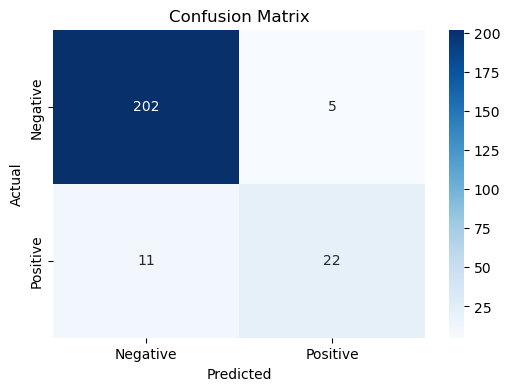

In [9]:
cm = confusion_matrix(y_test,predictions)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()